*Variables*

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [15]:
!pip install matplotlib

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


**Box plot for the "Median value of owner-occupied homes**

Text(0.5, 1.0, 'Median value of owner-occupied homes')

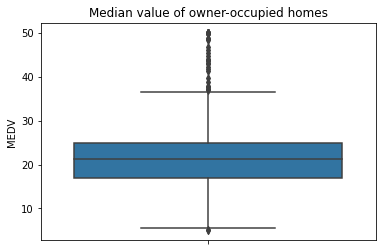

In [23]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median value of owner-occupied homes")

---
**Provide a  bar plot for the Charles river variable**

Text(0.5, 0, 'Charles river variable')

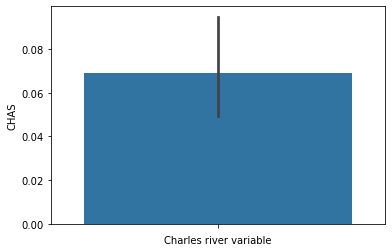

In [29]:
ax = sns.barplot(y='CHAS',data=boston_df)
plt.xlabel('Charles river variable')

---
**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [53]:
boston_df.loc[(boston_df.AGE <=35), 'age_group'] = '<35'
boston_df.loc[(boston_df.AGE >35)&(boston_df.AGE < 70), 'age_group'] = 'between age 35 and 70'
boston_df.loc[(boston_df.AGE >=70), 'age_group'] = '>70'

Text(0.5, 1.0, 'Median vs Age')

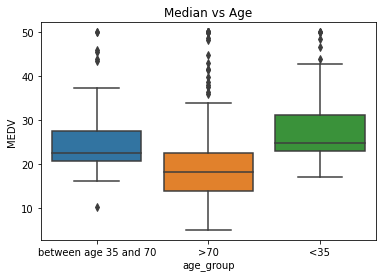

In [54]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Median vs Age')

---
**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

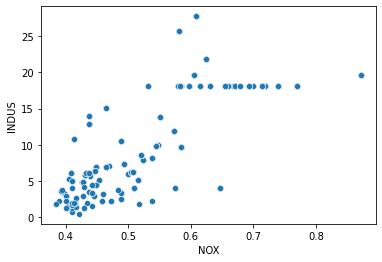

In [39]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)

There exist a positive relationship that can be seen by the slope in the plot.

---
**Create a histogram for the pupil to teacher ratio variable**

Text(0.42499999999999716, 0.5, 'Pupil to teacher ratio')

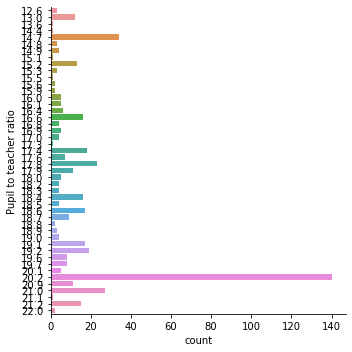

In [51]:
sns.catplot(y='PTRATIO', kind='count', data=boston_df)
plt.ylabel('Pupil to teacher ratio')

# Task 5

In [41]:
import scipy.stats

### Question 1
Is there a significant difference in median value of houses bounded by the Charles river or not?

**Stating Hypothesis**
-   $H_0: µ_1 = µ_2$ ("there is no difference in between the median value of houses bounded by Charles river and not bounded.")

-   $H_a: µ_1 ≠ µ_2$ ("there is a difference in between the median value of houses bounded by Charles river and not bounded.")

**Setting α to 0.05**

In [42]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than 0.05, null hypothesis is rejected as there is no significance difference in median value of houses 

## Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

**Stating Hypothesis**
-    Null Hypothesis: There is no difference in median values of houses for occupied units built prior to 1940.
-    Alternative Hypothesis: There is a difference in median values of houses for occupied units built prior to 1940.

**Setting alpha = 0.05**

In [43]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

In [44]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964904, pvalue=0.2083265383143275)

**Conclusion:** Since the p-value is greater than 0.05, fail to reject the null hypothesis that there is a difference in median values of houses prior to 1940.

## Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

State the hypothesis:

𝐻0:  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
𝐻1:  There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [45]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

CONCLUSION: Since the p-value is greater than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Question 4
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

Hypothesis

𝐻0:β1  = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
𝐻1:β1  is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [48]:
import statsmodels.api as sm

In [50]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           1.21e-08
Time:                        03:28:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** There is an impact of 1.0916 of weighted distance to the five Boston employment centres on the median value 